<a href="https://colab.research.google.com/github/VivianTNT/PredictingFlightDelays/blob/main/Predicting_Flight_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Flight Delays: Data Modeling Challenge**

## **Possible Trends/Variables to Look Out For**

**Scheduled Departure Time (`CRS_DEP_TIME`):**
* The planned departure time can be a valuable feature to consider. Flights during certain times of the day may be more prone to delays due to air traffic or other factors.

**Day of the Week (`DAY_OF_WEEK`) and Month (`MONTH`):**
* These temporal features might influence flight delays based on factors like weekends, holidays, or seasonal patterns.

**Carrier Information (`OP_UNIQUE_CARRIER`):**
* Different carriers may have varying on-time performance, so the airline itself can be a predictive feature.

**Origin and Destination (`ORIGIN, DEST`):**
* Certain airports may experience more delays due to weather, congestion, or other airport-specific reasons.

**Weather Information:**
* Incorporating weather data for the departure and arrival locations could be crucial in predicting delays.

**Airport Traffic (`AIRPORT_FLIGHTS_MONTH`):**
* The number of flights at the departure airport in a month might impact the likelihood of delays.

**Day/Night Flight (`CRS_DEP_TIME`):**
* Whether the flight is during the day or night could influence delays due to air traffic or weather conditions.

**Holiday Period:**
* Include a binary feature indicating if the flight is during a holiday period, as these times may experience increased passenger volumes and potential delays.

In [ ]:
# Imports
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **EDA**

In [ ]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_loc = '/content/drive/My Drive/Xiao_Vivian_WAF_Challenge/fa23_datachallenge.csv'
raw_df = pd.read_csv(data_loc)

In [ ]:
raw_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_NAME,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PRCP,SNOW,SNWD,TMIN,TMAX,TAVG,AWND,PSUN,TSUN,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS
0,6,8,6,AA,N186US,1216,11298,Dallas Fort Worth Regional,DFW,"Dallas/Fort Worth, TX",11057,CLT,"Charlotte, NC",839,839.0,0.0,0.0,0800-0859,1215,1217.0,2.0,1200-1259,0.0,NaN,156.0,158.0,936.0,4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,69.0,92.0,NaN,6.04,NaN,NaN,25390.0,76419.0,12632.0,2907365.0,11744595.0,0.000098,0.000177
1,5,19,7,OO,N445SW,3643,11823,NaN,FWA,"Fort Wayne, IN",10397,ATL,"Atlanta, GA",800,755.0,0.0,0.0,0800-0859,956,942.0,0.0,0900-0959,0.0,NaN,116.0,107.0,508.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,18,3,MQ,N226NN,3303,11298,Dallas Fort Worth Regional,DFW,"Dallas/Fort Worth, TX",10781,BTR,"Baton Rouge, LA",2220,2219.0,0.0,0.0,2200-2259,2340,2334.0,0.0,2300-2359,0.0,NaN,80.0,75.0,383.0,2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,29.0,58.0,NaN,3.36,NaN,NaN,25322.0,26721.0,5416.0,2907365.0,1204766.0,0.000348,0.000107
3,1,2,3,YX,N408YX,4697,10785,NaN,BTV,"Burlington, VT",11278,DCA,"Washington, DC",556,553.0,0.0,0.0,0001-0559,759,753.0,0.0,0700-0759,0.0,NaN,123.0,120.0,437.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,21,4,DL,N986AT,2639,14771,San Francisco International,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1226,1229.0,3.0,0.0,1200-1259,1351,1351.0,0.0,1300-1359,0.0,NaN,85.0,82.0,337.0,2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,46.0,61.0,53.0,7.61,NaN,NaN,13989.0,84142.0,1146.0,1908862.0,12460183.0,0.000144,0.000149


In [ ]:
raw_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PRCP,SNOW,SNWD,TMIN,TMAX,TAVG,AWND,PSUN,TSUN,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS
count,890644.000000,890644.000000,890644.000000,890644.000000,890644.000000,890644.000000,890644.000000,874989.000000,874983.000000,874983.000000,890644.000000,874080.000000,872065.000000,890644.000000,890630.000000,872065.000000,890644.000000,890644.000000,166733.000000,166733.000000,166733.000000,166733.000000,166733.000000,740952.000000,535313.000000,517691.000000,740966.000000,741017.000000,640960.000000,741088.000000,2158.000000,2119.000000,744781.000000,744781.000000,744781.000000,7.447810e+05,7.447810e+05,744781.000000,744781.000000
mean,6.582800,15.729693,3.935111,2557.051234,12646.741929,12647.394874,1329.663311,1334.092043,14.140627,0.186856,1485.655636,1462.588732,14.186835,0.018237,141.814290,136.580028,799.900916,3.674111,21.164227,3.799392,16.692976,0.092837,27.382750,0.104146,0.056713,0.159976,52.139012,70.667425,60.850515,8.343487,36.887859,286.240208,12661.699454,63378.814653,3448.589969,1.595160e+06,7.904560e+06,0.000099,0.000136
std,3.403242,8.761630,1.994265,1798.793938,1523.321634,1523.348525,493.011624,507.228246,48.149006,0.389796,521.494959,542.642179,47.864388,0.133809,72.198188,72.435543,591.297775,2.328900,66.801931,32.626654,40.625763,2.879271,52.657293,0.310208,0.446041,0.987789,17.510117,18.769882,17.786419,3.653206,35.556643,281.531713,9093.783252,34179.832079,4350.140219,1.155475e+06,5.013258e+06,0.000087,0.000047
min,1.000000,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,15.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.000000,-10.000000,-18.000000,0.000000,0.000000,0.000000,1100.000000,5582.000000,1.000000,7.047600e+04,4.737940e+05,0.000000,0.000007
25%,4.000000,8.000000,2.000000,1027.000000,11292.000000,11292.000000,913.000000,914.000000,0.000000,0.000000,1100.000000,1046.000000,0.000000,0.000000,90.000000,84.000000,369.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,58.000000,48.000000,5.820000,2.000000,10.000000,4956.000000,25142.000000,599.000000,6.142360e+05,2.884187e+06,0.000034,0.000099
50%,7.000000,16.000000,4.000000,2158.000000,12889.000000,12889.000000,1320.000000,1326.000000,0.000000,0.000000,1515.000000,1503.000000,0.000000,0.000000,124.000000,119.000000,639.000000,3.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,54.000000,73.000000,63.000000,7.830000,27.000000,193.000000,11105.000000,70878.000000,2037.000000,1.472200e+06,8.501631e+06,0.000062,0.000125
75%,10.000000,23.000000,6.000000,3916.000000,13931.000000,13931.000000,1735.000000,1745.000000,7.000000,0.000000,1920.000000,1917.000000,7.000000,0.000000,171.000000,167.000000,1032.000000,5.000000,18.000000,0.000000,20.000000,0.000000,34.000000,0.030000,0.000000,0.000000,66.000000,86.000000,75.000000,10.290000,70.000000,541.000000,18465.000000,86312.000000,4797.000000,2.006675e+06,1.246018e+07,0.000144,0.000177
max,12.000000,31.000000,7.000000,7933.000000,16869.000000,16869.000000,2359.000000,2400.000000,2710.000000,1.000000,2400.000000,2400.000000,2695.000000,1.000000,705.000000,761.000000,5095.000000,11.000000,2695.000000,1550.000000,1741.000000,442.000000,1651.000000,7.130000,17.200000,25.200000,93.000000,120.000000,103.000000,33.780000,100.000000,908.000000,35256.000000,117728.000000,21837.000000,4.365661e+06,1.338300e+07,0.000348,0.000229


### **Heat Map of Correlations**

In [ ]:
raw_df_corr = raw_df.corr()

<ipython-input-6-37696b9d88d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_df_corr = raw_df.corr()


<Axes: >

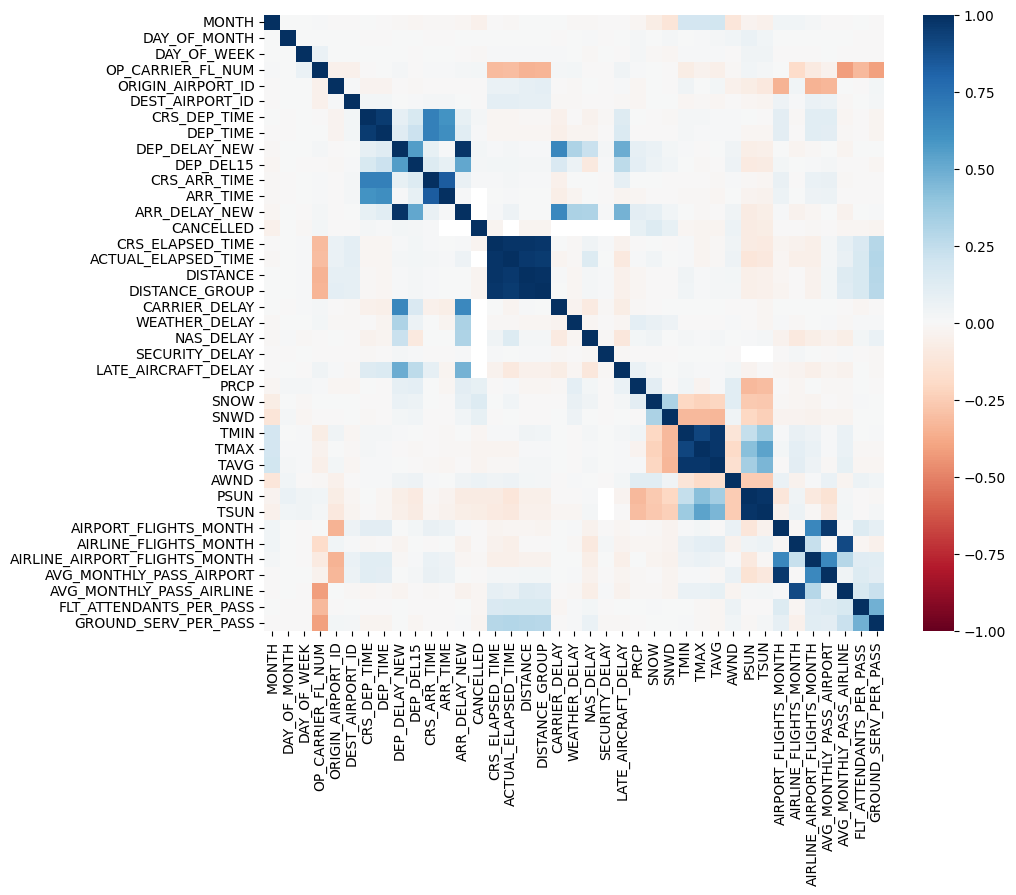

In [ ]:
# Heatmap of Correlations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(raw_df_corr, cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, annot=False)

**Observations:**

Disregarding the paired correlations between obviously related variables (e.g. ARR_DELAY_NEW is expectedly correlated with DEP_DELAY_NEW), the 2 target variables are not strongly correlated with any other variables.

However, we will remove the related variables from our models (i.e. all of the delay types and information on arrival times), since those are dependent on the delay times. In other words, the model would be trivial if we included those variables in our calculations.

###**Data Processing/Filtering**

In [ ]:
# Getting an idea of how many columns and rows there are
print(raw_df.shape)

(890644, 49)


In [ ]:
# Check for NaN values in each row and sum the results
nan_rows = raw_df.isna().any(axis=1).sum()
print (nan_rows)

890644


In [ ]:
nan_counts = raw_df.isna().sum()
print(nan_counts)

MONTH                                 0
DAY_OF_MONTH                          0
DAY_OF_WEEK                           0
OP_UNIQUE_CARRIER                     0
TAIL_NUM                           2144
OP_CARRIER_FL_NUM                     0
ORIGIN_AIRPORT_ID                     0
ORIGIN_AIRPORT_NAME              149484
ORIGIN                                0
ORIGIN_CITY_NAME                      0
DEST_AIRPORT_ID                       0
DEST                                  0
DEST_CITY_NAME                        0
CRS_DEP_TIME                          0
DEP_TIME                          15655
DEP_DELAY_NEW                     15661
DEP_DEL15                         15661
DEP_TIME_BLK                          0
CRS_ARR_TIME                          0
ARR_TIME                          16564
ARR_DELAY_NEW                     18579
ARR_TIME_BLK                          0
CANCELLED                             0
CANCELLATION_CODE                874401
CRS_ELAPSED_TIME                     14


In [ ]:
# Only keeping the rows that contain both of the Target variables
filtered_df = raw_df[(raw_df['DEP_DELAY_NEW'].notna()) & (raw_df['DEP_DEL15'].notna())]
full_df = filtered_df

# Removing TSUN and PSUN columns since nearly all rows are NaNs
filtered_df = filtered_df.drop(columns=['TSUN','PSUN'])

# Only keeping the flights that were not cancelled
# Removing FLT_ATTENDANTS_PER_PASS and GROUND_SERV_PER_PASS due to ~0 std dev
# Removing ORIGIN_AIRPORT_NAME, ORIGIN_AIRPORT_ID, DEST_AIRPORT_ID due to redundancy
canceled_df = filtered_df[filtered_df['CANCELLED'] == 1]
filtered_df = filtered_df[filtered_df['CANCELLED'] == 0]
filtered_df = filtered_df.drop(columns=['CANCELLED','CANCELLATION_CODE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','ORIGIN_AIRPORT_NAME','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])

# Imputation: Replace nonzero values with 1 and zero/NaN values with 0 for the specified columns
columns_to_process = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for col in columns_to_process:
    filtered_df[col] = filtered_df[col].apply(lambda x: 1 if x != 0 else 0)

filtered_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PRCP,SNOW,SNWD,TMIN,TMAX,TAVG,AWND,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE
0,6,8,6,AA,N186US,1216,DFW,"Dallas/Fort Worth, TX",CLT,"Charlotte, NC",839,839.0,0.0,0.0,0800-0859,1215,1217.0,2.0,1200-1259,156.0,158.0,936.0,4,1,1,1,1,1,0.0,NaN,NaN,69.0,92.0,NaN,6.04,25390.0,76419.0,12632.0,2907365.0,11744595.0
1,5,19,7,OO,N445SW,3643,FWA,"Fort Wayne, IN",ATL,"Atlanta, GA",800,755.0,0.0,0.0,0800-0859,956,942.0,0.0,0900-0959,116.0,107.0,508.0,3,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,18,3,MQ,N226NN,3303,DFW,"Dallas/Fort Worth, TX",BTR,"Baton Rouge, LA",2220,2219.0,0.0,0.0,2200-2259,2340,2334.0,0.0,2300-2359,80.0,75.0,383.0,2,1,1,1,1,1,0.0,NaN,NaN,29.0,58.0,NaN,3.36,25322.0,26721.0,5416.0,2907365.0,1204766.0
3,1,2,3,YX,N408YX,4697,BTV,"Burlington, VT",DCA,"Washington, DC",556,553.0,0.0,0.0,0001-0559,759,753.0,0.0,0700-0759,123.0,120.0,437.0,2,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,21,4,DL,N986AT,2639,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",1226,1229.0,3.0,0.0,1200-1259,1351,1351.0,0.0,1300-1359,85.0,82.0,337.0,2,1,1,1,1,1,0.0,NaN,NaN,46.0,61.0,53.0,7.61,13989.0,84142.0,1146.0,1908862.0,12460183.0


In [ ]:
print(canceled_df.shape)

(582, 47)


In [ ]:
print(filtered_df.shape)

(874401, 40)


In [ ]:
# Count the number of unique values in each column
unique_values_count_per_column = filtered_df.nunique()

print("Number of unique values in each column:")
print(unique_values_count_per_column)

Number of unique values in each column:
MONTH                              12
DAY_OF_MONTH                       31
DAY_OF_WEEK                         7
OP_UNIQUE_CARRIER                  17
TAIL_NUM                         5855
OP_CARRIER_FL_NUM                6894
ORIGIN                            360
ORIGIN_CITY_NAME                  352
DEST                              360
DEST_CITY_NAME                    352
CRS_DEP_TIME                     1337
DEP_TIME                         1437
DEP_DELAY_NEW                    1103
DEP_DEL15                           2
DEP_TIME_BLK                       19
CRS_ARR_TIME                     1406
ARR_TIME                         1440
ARR_DELAY_NEW                    1102
ARR_TIME_BLK                       19
CRS_ELAPSED_TIME                  554
ACTUAL_ELAPSED_TIME               660
DISTANCE                         1564
DISTANCE_GROUP                     11
CARRIER_DELAY                       2
WEATHER_DELAY                       2
NAS_DELAY 

In [ ]:
print (filtered_df.dtypes)

MONTH                              int64
DAY_OF_MONTH                       int64
DAY_OF_WEEK                        int64
OP_UNIQUE_CARRIER                 object
TAIL_NUM                          object
OP_CARRIER_FL_NUM                  int64
ORIGIN                            object
ORIGIN_CITY_NAME                  object
DEST                              object
DEST_CITY_NAME                    object
CRS_DEP_TIME                       int64
DEP_TIME                         float64
DEP_DELAY_NEW                    float64
DEP_DEL15                        float64
DEP_TIME_BLK                      object
CRS_ARR_TIME                       int64
ARR_TIME                         float64
ARR_DELAY_NEW                    float64
ARR_TIME_BLK                      object
CRS_ELAPSED_TIME                 float64
ACTUAL_ELAPSED_TIME              float64
DISTANCE                         float64
DISTANCE_GROUP                     int64
CARRIER_DELAY                      int64
WEATHER_DELAY   

### **Line Plots**

#### **Delayed Flights per Hour**

In [ ]:
# Casting datatypes
filtered_df = filtered_df.astype({'OP_UNIQUE_CARRIER': 'string','TAIL_NUM': 'string', 'ORIGIN': 'string','ORIGIN_CITY_NAME': 'string','DEST': 'string','DEST_CITY_NAME': 'string','DEP_TIME_BLK': 'string','ARR_TIME_BLK': 'string'})

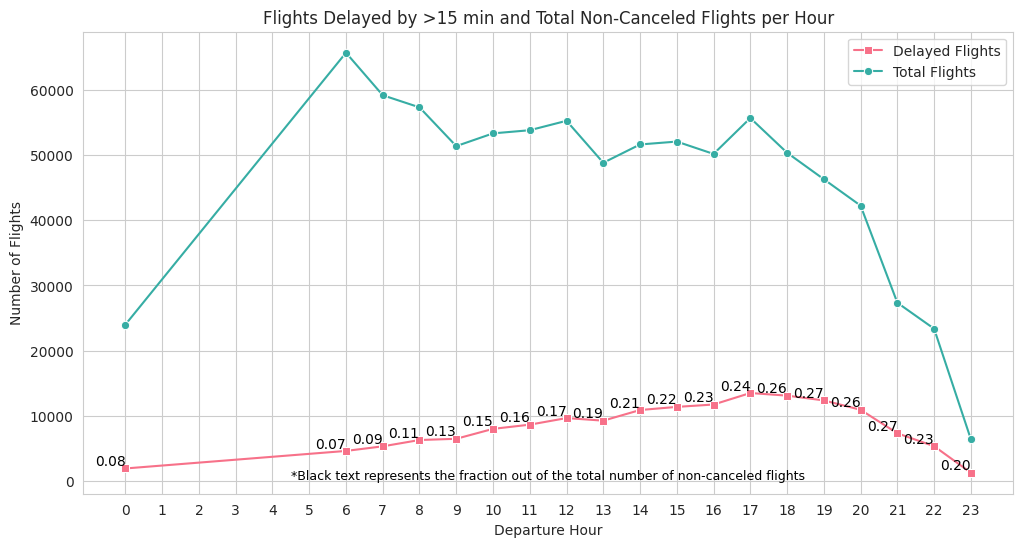

In [ ]:
palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# Extract start hour and convert to 24-hour format
filtered_df['START_HOUR'] = filtered_df['DEP_TIME_BLK'].str.extract('(\d{2})\d{2}-').astype(int)

# Calculate number of delayed flights (>15 min) per time block
delayed_counts = filtered_df[filtered_df['DEP_DELAY_NEW'] > 15].groupby('START_HOUR').size().reset_index(name='DelayedFlights')

# Calculate total number of flights per hour
total_counts = filtered_df.groupby('START_HOUR').size().reset_index(name='TotalFlights')
merged_df = delayed_counts.merge(total_counts, on='START_HOUR')

# Calculate fraction of delayed flights
merged_df['DelayedPercentage'] = (merged_df['DelayedFlights'] / merged_df['TotalFlights'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=merged_df, x='START_HOUR', y='DelayedFlights', marker='s', color=palette[0], ax=ax, label='Delayed Flights')
sns.lineplot(data=merged_df, x='START_HOUR', y='TotalFlights', marker='o', color=palette[1], ax=ax, label='Total Flights')

# Label each point on the delayed flights line with the percentage
for i, row in merged_df.iterrows():
    ax.text(row['START_HOUR'], row['DelayedFlights'], f"{row['DelayedPercentage']:.2f}", ha='right', va='bottom', fontsize=10, color='black')

ax.set_xlabel('Departure Hour')
ax.set_ylabel('Number of Flights')
ax.set_title('Flights Delayed by >15 min and Total Non-Canceled Flights per Hour')

# Set x-axis ticks and labels
ax.set_xticks(range(24))
ax.set_xticklabels([str(i) for i in range(24)])
ax.text(0.5, 0.03, '*Black text represents the fraction out of the total number of non-canceled flights', transform=ax.transAxes, color='black', fontsize=9, ha='center')

plt.legend()
plt.show()


Observations:
* Beginning and end of the day (6 am, 12 am) see the lowest rate (18%) even though 6 am has the highest number of non-canceled flights in total
* Percentage of flights that are delayed steadily increases throughout the day until 5 pm, even though the number of flights trend downwards.



#### **Delayed Flights per Month**

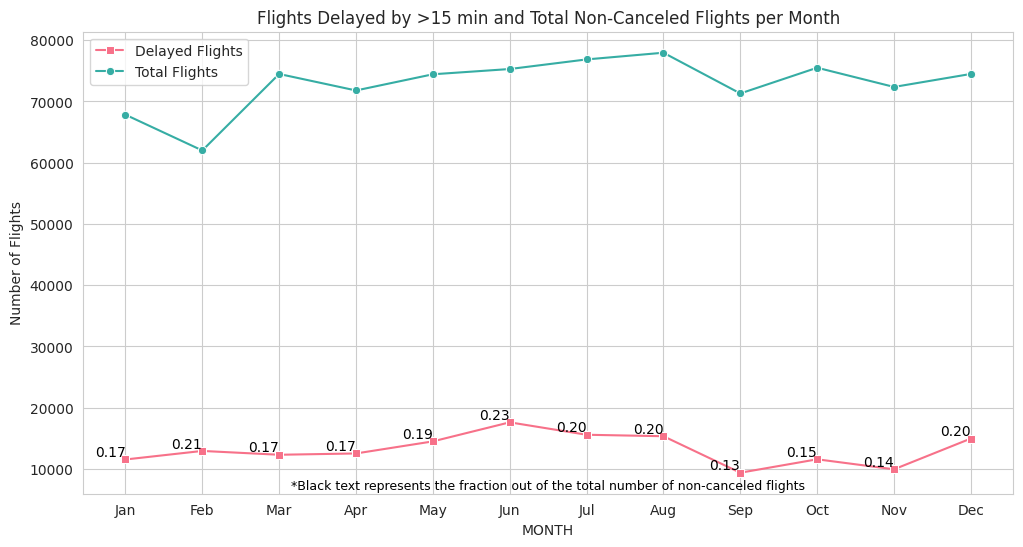

In [ ]:
# Calculate number of delayed flights (>15 min) per month
delayed_counts = filtered_df[filtered_df['DEP_DELAY_NEW'] > 15].groupby('MONTH').size().reset_index(name='DelayedFlights')

# Calculate total number of flights per hour
total_counts = filtered_df.groupby('MONTH').size().reset_index(name='TotalFlights')
merged_df = delayed_counts.merge(total_counts, on='MONTH')

# Calculate fraction of delayed flights
merged_df['DelayedPercentage'] = (merged_df['DelayedFlights'] / merged_df['TotalFlights'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=merged_df, x='MONTH', y='DelayedFlights', marker='s', color=palette[0], ax=ax, label='Delayed Flights')
sns.lineplot(data=merged_df, x='MONTH', y='TotalFlights', marker='o', color=palette[1], ax=ax, label='Total Flights')

# Label each point on the delayed flights line with the percentage
for i, row in merged_df.iterrows():
    ax.text(row['MONTH'], row['DelayedFlights'], f"{row['DelayedPercentage']:.2f}", ha='right', va='bottom', fontsize=10, color='black')

ax.set_xlabel('MONTH')
ax.set_ylabel('Number of Flights')
ax.set_title('Flights Delayed by >15 min and Total Non-Canceled Flights per Month')

# Set x-axis ticks and labels
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.text(0.5, 0.01, '*Black text represents the fraction out of the total number of non-canceled flights', transform=ax.transAxes, color='black', fontsize=9, ha='center')

plt.legend()
plt.show()

**Observations:**

* Flights across month do not differ too much
* Peak travel months/holidays (June, Dec) have higher than average rates of delays, bu not by a significant amount.

### **Geographical Locations Map**

The following interactive map shows each airport and its size/color is dependent on its percentage of delayed flights (>15 min). I found the longitude/latitudes of the airports by merging an online dataset (linked below) which has the locations.

You can click on the circles to see exactly which airports the circles are referring to, as well as their specific delay rate.

In [ ]:
# https://openflights.org/data.html#country
data_loc = '/content/drive/My Drive/Xiao_Vivian_WAF_Challenge/airports.csv'
airports_df = pd.read_csv(data_loc)

In [ ]:
airports_df.head()

,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [ ]:
airports_df = airports_df.drop(columns=['1', 'Goroka', 'AYGA', '5282', '10', 'U', 'Pacific/Port_Moresby', 'airport', 'OurAirports'])

In [ ]:
# Define column names
columns = ['AIRPORT_NAME', 'COUNTRY', 'ORIGIN', 'LATITUDE', 'LONGITUDE']
airports_df.columns = columns

airports_df = airports_df[airports_df['COUNTRY'] == 'United States']

In [ ]:
# Calculate the total number of flights and delayed flights for each 'ORIGIN'
delayed_counts = filtered_df[filtered_df['DEP_DELAY_NEW'] > 15].groupby('ORIGIN').size().reset_index(name='DelayedFlights')

# Calculate the fraction of delayed flights for each 'ORIGIN'
total_counts = filtered_df.groupby('ORIGIN').size().reset_index(name='TotalFlights')

# Merge the dataframes
merged_df = delayed_counts.merge(total_counts, on='ORIGIN')

# Calculate the fraction of delayed flights
merged_df['DelayedPercentage'] = (merged_df['DelayedFlights'] / merged_df['TotalFlights'])

In [ ]:
merged_df.head()

,ORIGIN,DelayedFlights,TotalFlights,DelayedPercentage
0,ABE,95,582,0.163230
1,ABI,47,270,0.174074
2,ABQ,396,2743,0.144367
3,ABR,10,88,0.113636
4,ABY,16,111,0.144144


In [ ]:
airports_merged_df = airports_df.merge(merged_df, on='ORIGIN')
airports_merged_df = airports_merged_df.drop(columns=['COUNTRY'])

In [ ]:
airports_merged_df.head()

,AIRPORT_NAME,ORIGIN,LATITUDE,LONGITUDE,DelayedFlights,TotalFlights,DelayedPercentage
0,Hilo International Airport,ITO,19.721399,-155.048004,32,742,0.043127
1,Fort Smith Regional Airport,FSM,35.336601,-94.367401,37,274,0.135036
2,Grand Forks International Airport,GFK,47.949299,-97.176102,36,243,0.148148
3,Ernest A. Love Field,PRC,34.654499,-112.419998,21,73,0.287671
4,Trenton Mercer Airport,TTN,40.276699,-74.813499,100,378,0.264550


In [ ]:
# Initialize the map
m = folium.Map(location=[airports_merged_df['LATITUDE'].mean(), airports_merged_df['LONGITUDE'].mean()], zoom_start=4)
high_delay_locations = []
# Iterate over the DataFrame and add circles with varying colors based on delayed fraction
for i, row in airports_merged_df.iterrows():
    delayed_percentage = row['DelayedPercentage']

    # Determine circle color based on delayed fraction
    # https://www.oag.com/on-time-performance-airlines-airports#:~:text=Probably%20most%20people%20in%20the,of%20their%20scheduled%20arrival%20time.
    if delayed_percentage >= 0.5:
        color = 'red'
        high_delay_locations.append(row['ORIGIN'])
    elif delayed_percentage >= 0.2:
        color = 'blue'
        high_delay_locations.append(row['ORIGIN'])
    else:
        color = 'green'

    folium.CircleMarker(
        location=(row['LATITUDE'], row['LONGITUDE']),
        radius=row['DelayedPercentage'] * 15,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Airport: {row['AIRPORT_NAME']}<br>Delayed Fraction: {row['DelayedPercentage']*100:.2f}%"
    ).add_to(m)

m.save('delayed_flight_geo_heatmap.html')
m


**Observations**:
* Using the thresholds from the challenge/from searching up standards online, an airport is considered "good" if `<20%` of its flights are delayed (using 15 min buffer).
* Most airports fall into the green zone on average.
* A significant number of airports also fall into the blue zone (between 20 and 50%).
* Only 1 airport falls into the red zone based on our 50% cutoff: St Cloud Regional Airport with a 55.6% average delay rate!

**Note**: This is using data without cancellations, but since the count of the cancellations is extremely small compared to the rest of the dataset, we choose to ignore cancellations (since a lot of other factors could've forced airports to cancel).

In [ ]:
len(high_delay_locations)

64

In [ ]:
high_delay_df = filtered_df[filtered_df['ORIGIN'].isin(high_delay_locations)]
print (high_delay_df.shape)

(259136, 41)


In [ ]:
low_delay_df = filtered_df[~filtered_df['ORIGIN'].isin(high_delay_locations)]
print (low_delay_df.shape)

(615265, 41)


Let's compare the statistics for the airports which tend to have higher delay times against the ones that have lower delay times.

In [ ]:
# Calculate the means for each column
low_delay_mean = low_delay_df.mean()
high_delay_mean = high_delay_df.mean()

# Compute percentage differences
abs_diff = np.abs(high_delay_mean - low_delay_mean)
perc_diff = 100* abs_diff / low_delay_mean
print(perc_diff)

MONTH                             0.455536
DAY_OF_MONTH                      0.224775
DAY_OF_WEEK                       0.209865
OP_CARRIER_FL_NUM                 9.563254
CRS_DEP_TIME                      2.944682
DEP_TIME                          3.161013
DEP_DELAY_NEW                    30.582832
DEP_DEL15                        33.690613
CRS_ARR_TIME                      3.177647
ARR_TIME                          2.145218
ARR_DELAY_NEW                    31.050066
CRS_ELAPSED_TIME                  8.925392
ACTUAL_ELAPSED_TIME               9.633815
DISTANCE                         10.723728
DISTANCE_GROUP                    8.735270
CARRIER_DELAY                     2.232786
WEATHER_DELAY                     6.180595
NAS_DELAY                         2.741568
SECURITY_DELAY                    7.018143
LATE_AIRCRAFT_DELAY               2.506571
PRCP                             11.155075
SNOW                             79.411167
SNWD                             30.440766
TMIN       

<ipython-input-30-6d78da539bac>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_delay_mean = low_delay_df.mean()
<ipython-input-30-6d78da539bac>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_delay_mean = high_delay_df.mean()


**Observations:**

`DISTANCE` (10.7%), `SNOW` (79.4%), `AIRPORT_FLIGHTS_MONTH` (51.5%), `AVG_MONTHLY_PASS_AIRPORT` (43.4%)

The above columns had a significant difference in the `high_delay_df` vs. the `low_delay_df`. Specifically, the average distance of flights from high delay locations was nearly **100** miles longer than those from low delay locations, 80% more snow on average, 51% more flights per month, and 43% more passengers per month.

In [ ]:
high_delay_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PRCP,SNOW,SNWD,TMIN,TMAX,TAVG,AWND,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,START_HOUR
count,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259027.000000,258417.000000,259136.000000,258417.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,259136.000000,248888.000000,172138.000000,155155.000000,248856.000000,248856.000000,205989.000000,248919.000000,248985.000000,248985.000000,248985.000000,2.489850e+05,2.489850e+05,259136.000000
mean,6.626034,15.696823,3.931468,2372.884123,1355.829514,1363.367483,16.892138,0.226865,1517.606543,1484.527022,17.025354,150.771078,145.581873,861.076925,3.904695,0.887700,0.784387,0.893635,0.769094,0.892045,0.107727,0.068761,0.177796,50.671264,69.054855,58.423440,9.616403,16328.794000,63224.881527,3999.316136,1.994419e+06,7.855862e+06,13.199011
std,3.400072,8.764316,1.991752,1728.208117,489.339599,507.898748,49.511092,0.418806,531.116286,562.901726,49.410453,71.046861,71.349150,567.717264,2.244175,0.315736,0.411247,0.308305,0.421413,0.310324,0.313732,0.458811,0.905735,18.465473,19.521278,18.507899,3.610325,7984.171926,33742.070952,3113.260371,8.896744e+05,4.846665e+06,5.063949
min,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,19.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.000000,-10.000000,-15.000000,0.890000,1497.000000,5582.000000,1.000000,2.836170e+05,4.737940e+05,0.000000
25%,4.000000,8.000000,2.000000,905.000000,930.000000,929.000000,0.000000,0.000000,1121.000000,1103.000000,0.000000,100.000000,95.000000,440.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.000000,55.000000,45.000000,7.160000,10792.000000,26909.000000,1497.000000,1.208249e+06,3.190369e+06,9.000000
50%,7.000000,16.000000,4.000000,2025.000000,1340.000000,1347.000000,0.000000,0.000000,1536.000000,1521.000000,0.000000,138.000000,133.000000,759.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,52.000000,72.000000,61.000000,9.170000,13989.000000,67273.000000,3560.000000,1.908862e+06,8.501631e+06,13.000000
75%,10.000000,23.000000,6.000000,3581.000000,1755.000000,1810.000000,11.000000,0.000000,1945.000000,1939.000000,12.000000,180.000000,175.000000,1076.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.030000,0.000000,0.000000,66.000000,85.000000,74.000000,11.630000,23471.000000,84142.000000,5503.000000,2.907365e+06,1.246018e+07,17.000000
max,12.000000,31.000000,7.000000,7851.000000,2359.000000,2400.000000,1619.000000,1.000000,2400.000000,2400.000000,1627.000000,705.000000,761.000000,5095.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.130000,9.900000,9.800000,83.000000,104.000000,92.000000,32.880000,29971.000000,117728.000000,13678.000000,3.103410e+06,1.338300e+07,23.000000


In [ ]:
low_delay_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PRCP,SNOW,SNWD,TMIN,TMAX,TAVG,AWND,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,START_HOUR
count,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615053.000000,613648.000000,615265.000000,613648.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,615265.000000,478694.000000,353499.000000,353230.000000,478740.000000,478791.000000,423637.000000,478803.000000,482451.000000,482451.000000,482451.000000,4.824510e+05,4.824510e+05,615265.000000
mean,6.595987,15.732185,3.939737,2623.805284,1317.046673,1321.591791,12.935956,0.169694,1470.867558,1453.349513,12.991489,138.416833,132.789207,777.680572,3.591010,0.907973,0.836061,0.918825,0.827144,0.914980,0.096916,0.038326,0.136304,52.971024,71.604815,62.118167,7.639507,10775.025319,63490.739708,3176.162483,1.390345e+06,7.945853e+06,12.762411
std,3.405204,8.758035,1.995307,1819.557935,493.750361,506.390476,47.393685,0.375364,516.259396,533.610561,47.147096,72.631934,72.554825,601.352417,2.365188,0.289064,0.370221,0.273104,0.378123,0.278912,0.298093,0.357190,0.959380,16.788196,18.156742,17.145862,3.442017,9067.396314,34323.468875,4870.479977,1.223474e+06,5.086657e+06,5.194912
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,15.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.000000,-10.000000,-18.000000,0.000000,1100.000000,5582.000000,1.000000,7.047600e+04,4.737940e+05,0.000000
25%,4.000000,8.000000,2.000000,1075.000000,905.000000,906.000000,0.000000,0.000000,1050.000000,1038.000000,0.000000,87.000000,81.000000,347.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.000000,59.000000,50.000000,5.140000,4055.000000,24496.000000,411.000000,4.042650e+05,2.688839e+06,9.000000
50%,7.000000,16.000000,4.000000,2209.000000,1310.000000,1317.000000,0.000000,0.000000,1502.000000,1454.000000,0.000000,117.000000,112.000000,594.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,55.000000,74.000000,64.000000,6.930000,8879.000000,72721.000000,1195.000000,1.065782e+06,1.174460e+07,13.000000
75%,10.000000,23.000000,6.000000,4043.000000,1730.000000,1737.000000,5.000000,0.000000,1911.000000,1909.000000,6.000000,168.000000,162.000000,1009.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.020000,0.000000,0.000000,66.000000,86.000000,76.000000,9.400000,14197.000000,86312.000000,3723.000000,1.903352e+06,1.246018e+07,17.000000
max,12.000000,31.000000,7.000000,7933.000000,2359.000000,2400.000000,2710.000000,1.000000,2359.000000,2400.000000,2695.000000,685.000000,734.000000,5095.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.240000,17.200000,25.200000,93.000000,120.000000,103.000000,33.780000,35256.000000,117728.000000,21837.000000,4.365661e+06,1.338300e+07,23.000000


## **Classification**

In [ ]:
# Metrics class for our models later
def calc_acc(model, y_pred, y_actual):
    # classification report
    print(classification_report(y_actual, y_pred))

    # draw confusion matrix
    cm = confusion_matrix(y_actual, y_pred)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    tick_labels = np.unique(np.concatenate((y_actual, y_pred)))
    plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
    plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

    # accuracy
    acc = accuracy_score(y_actual, y_pred)
    print(f"Accuracy score: {acc}")

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Removing NaNs from data
nan_rows = filtered_df.isna().any(axis=1).sum()
print (nan_rows)

396381


In [ ]:
filtered_df.shape

(874401, 41)

In [ ]:
nan_counts = filtered_df.isna().sum()
print(nan_counts)

MONTH                                 0
DAY_OF_MONTH                          0
DAY_OF_WEEK                           0
OP_UNIQUE_CARRIER                     0
TAIL_NUM                              0
OP_CARRIER_FL_NUM                     0
ORIGIN                                0
ORIGIN_CITY_NAME                      0
DEST                                  0
DEST_CITY_NAME                        0
CRS_DEP_TIME                          0
DEP_TIME                              0
DEP_DELAY_NEW                         0
DEP_DEL15                             0
DEP_TIME_BLK                          0
CRS_ARR_TIME                          0
ARR_TIME                            321
ARR_DELAY_NEW                      2336
ARR_TIME_BLK                          0
CRS_ELAPSED_TIME                      0
ACTUAL_ELAPSED_TIME                2336
DISTANCE                              0
DISTANCE_GROUP                        0
CARRIER_DELAY                         0
WEATHER_DELAY                         0


In [ ]:
# Drop the columns that are dependent on departure times/delays
no_nans_df = filtered_df.drop(columns=['ARR_TIME','ARR_DELAY_NEW','ARR_TIME_BLK','CRS_ELAPSED_TIME','ORIGIN_CITY_NAME','DEST_CITY_NAME'])

# no_nans_df = no_nans_df.drop(columns=['SNWD','TAVG','TAIL_NUM'])
no_nans_df = no_nans_df.drop(columns=['SNWD','TAVG','TAIL_NUM','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'])
no_nans_df = no_nans_df.dropna()

In [ ]:
# one-hot encoded matrix
categorical_columns = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK']
one_hot_df = pd.get_dummies(no_nans_df, columns=categorical_columns)

In [ ]:
# Instantiate the label encoder
label_encoder = LabelEncoder()
label_encode_df = no_nans_df
# Iterate through each categorical column and apply label encoding
for col in categorical_columns:
    label_encode_df[col + '_encoded'] = label_encoder.fit_transform(label_encode_df[col])

# Drop the original categorical columns
label_encode_df.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
# Load the preprocessed dataset
# Features: Choose relevant features (X) and target variable (y)
X = label_encode_df.drop(columns=['DEP_DELAY_NEW', 'DEP_DEL15'])
y = label_encode_df['DEP_DEL15']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Forest Classifier**

I selected Random Forest because it is a powerful model known for returning high accuracies, especially compared to other models like logistic regression. Additionally, it is able to dampen the effects of overfitting (which is a common issue in decision trees).

Finally, Random Forests are easy to tune with only a few hyperparameters to optimize. This can save time and computational resources compared to other models with many hyperparameters.

In [ ]:
# Train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Test
y_pred_rf = rf_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     83819
         1.0       0.99      0.76      0.86     19746

    accuracy                           0.95    103565
   macro avg       0.97      0.88      0.92    103565
weighted avg       0.95      0.95      0.95    103565

Accuracy score: 0.952947424322889


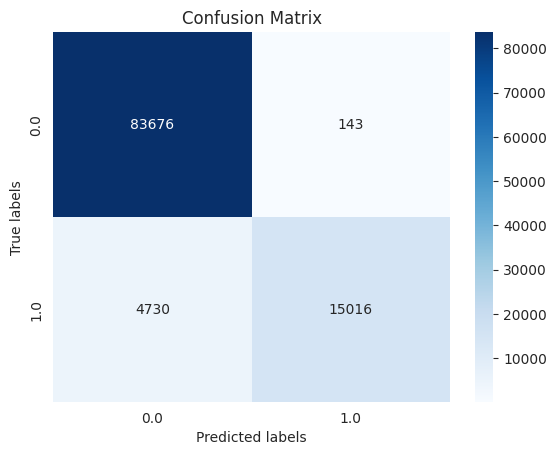

In [ ]:
# Evaluate model
calc_acc(rf_model, y_pred_rf, y_test)

From the accuracy, precision, recall, and f1-score, it appears that Random Forest does reasonably well on this dataset. I also decided to use Cross-Validation to minimize the chance that the model was overfitted.

Since the dataset has a class imbalance (e.g. much fewer delayed flights class than not delayed), the classifier might achieve high accuracy by simply predicting the majority class. In this case, we can also look at other metrics like precision, recall, and F1-score.

**Recall** for Class **0** **(On-Time Flights)** - 1.00:

* The model has a perfect recall for the majority class (0), indicating that it effectively identifies the actual on-time flights.
* Out of all actual on-time flights, the model correctly identifies 100% of them as on-time.

**Recall** for Class **1** **(Delayed Flights)** - 0.76:

* The model has a lower recall for the minority class (1), indicating that it is not as effective at identifying delayed flights.
* Out of all actual delayed flights, the model correctly identifies 76% of them as delayed.

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = list(X.columns)

# Display the feature importance scores
feature_importance_df = pd.DataFrame()
feature_importance_df['Feature'] = feature_names
feature_importance_df['Importance'] = feature_importances

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by=['Importance'], ascending=False)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
5,DEP_TIME,0.373244
4,CRS_DEP_TIME,0.136317
20,START_HOUR,0.046317
24,DEP_TIME_BLK_encoded,0.045024
6,CRS_ARR_TIME,0.040892
7,ACTUAL_ELAPSED_TIME,0.029972
3,OP_CARRIER_FL_NUM,0.026463
14,AWND,0.025622
13,TMAX,0.024365
12,TMIN,0.024085


### **Undersampling**

In [ ]:
# Checking for Class Imbalance
counts = no_nans_df['DEP_DEL15'].value_counts()

# Access the count for 0 and 1
count_0 = counts[0] if 0 in counts else 0
count_1 = counts[1] if 1 in counts else 0

print("Count of 0 in 'DEP_DEL15':", count_0)
print("Count of 1 in 'DEP_DEL15':", count_1)

Count of 0 in 'DEP_DEL15': 419757
Count of 1 in 'DEP_DEL15': 98067


In [ ]:
# Trying Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
under_X_train, under_y_train = rus.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(under_X_train, under_y_train, test_size=0.2, random_state=42)

In [ ]:
# Train
rf_model_under = RandomForestClassifier(random_state=42)
rf_model_under.fit(X_train, y_train)

# Test
y_pred_rf_under = rf_model_under.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     19554
         1.0       0.96      0.95      0.95     19673

    accuracy                           0.95     39227
   macro avg       0.95      0.95      0.95     39227
weighted avg       0.95      0.95      0.95     39227

Accuracy score: 0.9524052310908303


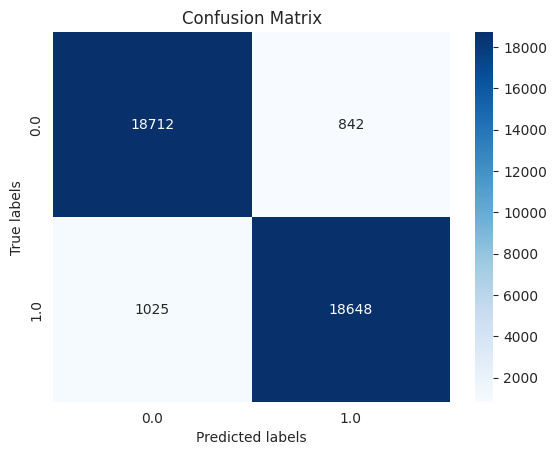

In [ ]:
# Evaluate model
calc_acc(rf_model_under, y_pred_rf_under, y_test)

### **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 15, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
rf_grid_search = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid_search, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 30],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Train
rf_model_best = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)
rf_model_best.fit(X_train, y_train)

# Test
y_pred_rf_best = rf_model_best.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     19554
         1.0       0.96      0.95      0.95     19673

    accuracy                           0.95     39227
   macro avg       0.95      0.95      0.95     39227
weighted avg       0.95      0.95      0.95     39227

Accuracy score: 0.9544191500752033


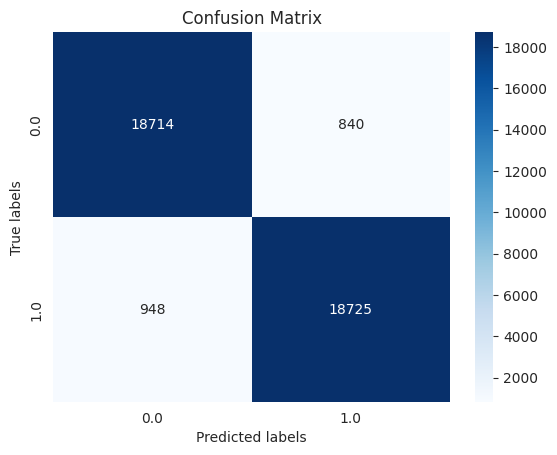

In [ ]:
# Evaluate model
calc_acc(rf_model_best, y_pred_rf_best, y_test)

### **Feature Importances**

Here we calculate the feature importances of the best-performing model (from the Grid Search).

In [ ]:
feature_importances_best = rf_model_best.feature_importances_
feature_names = list(X.columns)

# Display the feature importance scores
feature_importance_best_df = pd.DataFrame()
feature_importance_best_df['Feature'] = feature_names
feature_importance_best_df['Importance'] = feature_importances_best

In [ ]:
feature_importance_best_df = feature_importance_best_df.sort_values(by=['Importance'], ascending=False)
feature_importance_best_df = feature_importance_best_df.head(20)
feature_importance_best_df

,Feature,Importance
5,DEP_TIME,0.375377
4,CRS_DEP_TIME,0.154346
20,START_HOUR,0.049575
24,DEP_TIME_BLK_encoded,0.048564
6,CRS_ARR_TIME,0.042533
7,ACTUAL_ELAPSED_TIME,0.024167
3,OP_CARRIER_FL_NUM,0.023036
10,PRCP,0.022568
14,AWND,0.022291
17,AIRLINE_AIRPORT_FLIGHTS_MONTH,0.021730


In [ ]:
# Get the original feature names (before label encoding)
original_feature_names = no_nans_df.drop(columns=['DEP_DELAY_NEW', 'DEP_DEL15']).columns

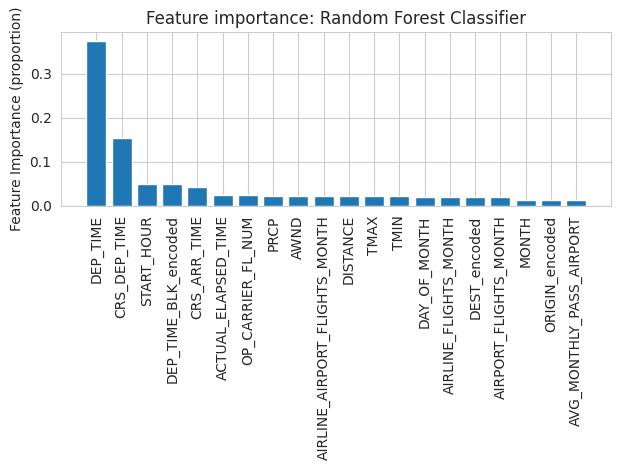

In [ ]:
fig, ax = plt.subplots()
plt.bar(feature_importance_best_df['Feature'], feature_importance_best_df['Importance'])
ax.set_title("Feature importance: Random Forest Classifier")
ax.set_ylabel("Feature Importance (proportion)")
plt.xticks(rotation=90)
fig.tight_layout()

### **MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
print (X_test.shape)

(39227, 25)


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(200,500,20,10)).fit(X_train, y_train)
y_pred_mlp_clf = mlp_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     19554
         1.0       0.00      0.00      0.00     19673

    accuracy                           0.50     39227
   macro avg       0.25      0.50      0.33     39227
weighted avg       0.25      0.50      0.33     39227

Accuracy score: 0.4984831876003773


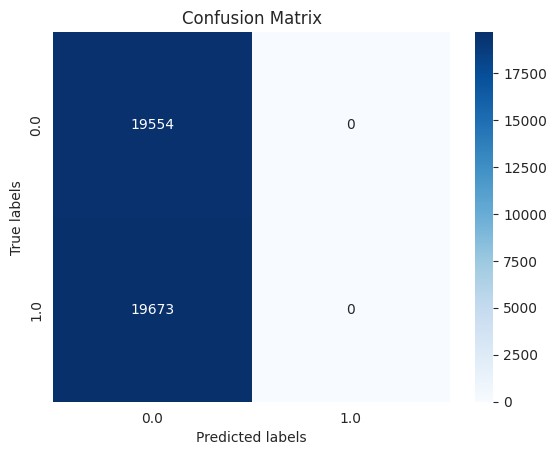

In [ ]:
# Evaluate model
calc_acc(mlp_clf, y_pred_mlp_clf, y_test)

**Observations:**

MLP Classifier is only predicting one class, so on a balanced dataset, the accuracy is only 50% (while we can see the recall for Class 1 is 100%, the recall for Class 0 is 0%).

## **Regression**

**Note on One-Hot encoding vs. Label Encoding:**

* Label Encoding resulted in significantly better results for the Random Forest Classifier than One-Hot Encoding (could be because RFC is good at branching, so having too many extra columns caused by the One-Hot encoding could obfuscate the results)
* However, One-Hot encoding the data resulted in better Regression results for each Regressor (not shown in the notebook because it keeps causing the notebook to crash).

In [ ]:
# Commented out because Colab keeps crashing when using this training data
# The one time this training data ran successfully, the regression models displayed lower RMSE's

#X = one_hot_df.drop(columns=['DEP_DELAY_NEW', 'DEP_DEL15'])
#y = one_hot_df['DEP_DELAY_NEW']  # Target variable

## Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **PCA**

In [ ]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize a PCA object
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [ ]:
# Get the explained_variance_ratios
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)

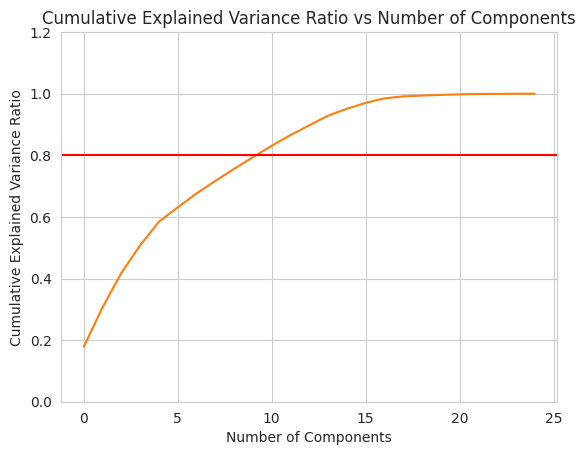

In [ ]:
# Plot the cumulative explained variance ratio across different number of components
plt.plot(1, len(cum_evr) + 1, cum_evr)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.ylim(0, 1.2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.show()

In [ ]:
# Find 9 to be a valid number of components
# Transform train and test data based on PCA
better_pca = PCA(n_components=9)
better_pca.fit(X_train_scaled)

X_train_pca = better_pca.transform(X_train_scaled)
X_test_pca = better_pca.transform(X_test_scaled)

### **Logistic Regression with PCA**

In [ ]:
# imports
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Perform logistic regression based on our PCA data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

y_pred_log_reg = log_reg_pca.predict(X_test_pca)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_log_reg)
mse = mean_squared_error(y_test, y_pred_log_reg)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.38371529813648764
Mean Squared Error (MSE): 0.38371529813648764
Root Mean Squared Error (RMSE): 0.6194475749702211


**Observations:**

Logistic Regression predicts the data with an RMSE of 0.62, meaning that predictions are on average 0.62 minutes off.

### **Gradient Boosting Machines**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Modify the training data to use only half of it
fraction_to_use = 1
num_samples_to_use = int(fraction_to_use * len(X_train_pca))

# Use only the first 'num_samples_to_use' samples for training
X_train_subset = X_train_pca[:num_samples_to_use]
y_train_subset = y_train[:num_samples_to_use]

# Create and train the model using the subset of the training data
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_subset, y_train_subset)

GradientBoostingRegressor()

In [ ]:
y_pred_gbr = gbr_model.predict(X_test_pca)


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.45137529024814305
Mean Squared Error (MSE): 0.22437438431245285
Root Mean Squared Error (RMSE): 0.47368173314204637


**Observations:**
* RMSE is of 0.47 < 0.62 of the LogisticRegressor -> Gradient Boosting caused a decrease in error.

### **MLP Regressor**

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(20,50,20,10)).fit(X_train_pca, y_train)
y_pred_regr = regr.predict(X_test_pca)
regr.score(X_test_pca, y_test)

0.10451823994958276

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_regr)
mse = mean_squared_error(y_test, y_pred_regr)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.44193357050900617
Mean Squared Error (MSE): 0.22386837975993854
Root Mean Squared Error (RMSE): 0.4731473129585949


**Observations:**

* Very similar error to Gradient Boosting Machine.
* MLP Regressor performed much better than MLP Classifier

## **Conclusions**


* **Random Forest Classifier** found ‘Departure Time’ to be most significant
  * Highest delay rates: 5-9 pm

* **Important to have balanced training data**
  * Ex: in Random Forest Classifier, the recall/f1 scores of the minor class (delayed) before balancing the data (using random undersampling in this case) were significantly lower than the rest of the metrics (0.76, 0.86).
  * Even though it appeared to have a high accuracy (95%), this is only because the initial train_test_split was on unbalanced data (many more non-delayed fights than delayed). The recall/f1 scores of the minor class show that the model does not predict delays very well. A recall of 0.76 means that out of all the actual flights that were delayed, the model only predicted 76% of them correctly.
  * The second model, which was run on balanced data, even though it had the same accuracy, its recall/f1 scores were very consistent/high across the board.
* **Trade-off between time/simplicity** (RF vs. MLP)
  * Complex models may not necessarily perform better than simpler models
  * After trying numerous combinations of neural network layers/hyperparameters, MLP was unable to predict one of the classes
  * While this doesn't mean I optimized the hyperparameters for MLP, it could mean that MLP (and other NNs) requires significantly more resources and time to train well (i.e. the current model is not complex enough).
  * However, it may not be necessary to train complex NN models since we found that Random Forest performed quite well, which is a much simpler model/faster to train due to its fewer hyperparameters.

